
# Project: Investigate a Dataset - Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive, and we encourage you to read more about it [here](https://www.kaggle.com/hugomathien/soccer).
What you get:
<ul>
    <li>+25,000 matches</li>
    <li>+10,000 players</li>
    <li>11 European Countries with their lead championship</li>
    <li>Seasons 2008 to 2016</li>
<li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</li>
    <li>Team line up with squad formation (X, Y coordinates)</li>
    <li>Betting odds from up to 10 providers</li>
<li>Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches</li>
</ul>



### Question(s) for Analysis


#### Q1) What team attributes leads to take less goals ? 

The dataset has team attributes for every team, so we will try to answer which team attributes makes your team takes less goals 
#### Q2) What player attributes would make player take higher rating ? 

Each player has some attributes affecting it's overall rating, we will try to know which attributes have most impact on his rating

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import seaborn as sns
import sqlite3
import os
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### Data Gathering 

Data is given in directory `./Database_Soccer`


### Data Assessing 
From [Kaggle Source](https://www.kaggle.com/hugomathien/soccer), the database has the following tables 

>- Country
>- League
>- Match
>- Team
>- Player
>- Team_Attributes
>- Player_Attributes

So we will load these table, each in dataframe and investgate them

In [3]:
database_dir ='Database_Soccer' #Database Directory

#Loading Dataframes
countries_df = pd.read_csv(os.path.join(database_dir,"Country.csv"))
leagues_df  = pd.read_csv(os.path.join(database_dir,"League.csv"))
matches_df  = pd.read_csv(os.path.join(database_dir,"Match.csv"))
teams_df  = pd.read_csv(os.path.join(database_dir,"Team.csv"))
players_df  = pd.read_csv(os.path.join(database_dir,"Player.csv"))
players_attributes_df  = pd.read_csv(os.path.join(database_dir,"Player_Attributes.csv"))
teams_attributes_df  = pd.read_csv(os.path.join(database_dir,"Team_Attributes.csv"))

#### Country dataframe

In [4]:
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


#### Leagues dataframe

In [6]:
leagues_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
leagues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


#### Matches dataframe

In [8]:
pd.set_option('display.max_columns', None)
matches_df.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.20,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.20,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.60,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.40,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
matches_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home_pl

Some column names have abbreviations you will get the meaning of each column name from [this link](http://www.football-data.co.uk/notes.txt)

#### Teams dataframe

In [10]:
teams_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [11]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


#### Teams attributes dataframe

In [12]:
teams_attributes_df.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,Organised,45,Normal,35,Normal,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [13]:
teams_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

#### Player Dataframe

In [14]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [15]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


#### Player Attributes dataframe

In [16]:
players_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
players_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele


### Data Cleaning
 

#### Joinning Tables

Team and team_attributes need to be in one dataframe, we will join them on any one of two keys (`team_api_id` or `team_fifa_api_id`)

In [18]:
#Merging (Joining) teams_df and teams_attributes_df on team_api_id and team_fifa_api_id
combined_teams_df = pd.merge(teams_df,teams_attributes_df,on=["team_api_id","team_fifa_api_id"])

#### Extract only wanted columns for investgation

some tables have many columns that's not needed for our investagtion, so will get rid of them to make it easier 

In [19]:
#Extracting only needed columns
clean_matches_df = matches_df[['home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','date']]

Convert date to datatime format

In [20]:
clean_matches_df['date'] = clean_matches_df['date'].apply(pd.to_datetime)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Clean Team dataframe

`buildUpPlayDribbling` has some null values, we will fill them for each team with the average of that team

In [21]:
#Copying dataframe and filling
cleaned_combined_teams_df = combined_teams_df.copy()
#Filling null with avg of every team
cleaned_combined_teams_df['buildUpPlayDribbling']=cleaned_combined_teams_df['buildUpPlayDribbling'].fillna(combined_teams_df.groupby('team_api_id')['buildUpPlayDribbling'].transform('mean'))
cleaned_combined_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 28 columns):
id_x                              1458 non-null int64
team_api_id                       1458 non-null int64
team_fifa_api_id                  1458 non-null float64
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id_y                              1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1396 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCro

Drop teams with null values and drop `id_x` and `id_y` column

In [22]:
#Droping Nulls 
cleaned_combined_teams_df.dropna(inplace=True)
#Droping unwanted columns
cleaned_combined_teams_df.drop(['id_x','id_y'],axis=1,inplace=True)


convert `date` column from object to datetime data type

In [23]:
cleaned_combined_teams_df['date'] = cleaned_combined_teams_df['date'].apply(pd.to_datetime)
cleaned_combined_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1457
Data columns (total 26 columns):
team_api_id                       1396 non-null int64
team_fifa_api_id                  1396 non-null float64
team_long_name                    1396 non-null object
team_short_name                   1396 non-null object
date                              1396 non-null datetime64[ns]
buildUpPlaySpeed                  1396 non-null int64
buildUpPlaySpeedClass             1396 non-null object
buildUpPlayDribbling              1396 non-null float64
buildUpPlayDribblingClass         1396 non-null object
buildUpPlayPassing                1396 non-null int64
buildUpPlayPassingClass           1396 non-null object
buildUpPlayPositioningClass       1396 non-null object
chanceCreationPassing             1396 non-null int64
chanceCreationPassingClass        1396 non-null object
chanceCreationCrossing            1396 non-null int64
chanceCreationCrossingClass       1396 non-null object
chanceCr

In [24]:
cleaned_combined_teams_df.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22,45,Balanced,52.0,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,673.0,KRC Genk,GEN,2011-02-22,66,Balanced,52.0,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,673.0,KRC Genk,GEN,2012-02-22,53,Balanced,52.0,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,673.0,KRC Genk,GEN,2013-09-20,58,Balanced,52.0,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,673.0,KRC Genk,GEN,2014-09-19,58,Balanced,52.0,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


### Merging Matches and teams dataframes


First we need to combine team attributes with the match, to do this we will merge cleaned matches and combined team dataframes on date and team id (`team_api_id`)

we will do so by first doing as home team and then as away team and finally concatinating both dataframes

In [25]:

home_matches_with_attributes = pd.merge(clean_matches_df,cleaned_combined_teams_df,left_on=['date','home_team_api_id'],right_on=['date','team_api_id'])

Since we are working on home team, `away_team_goal` will be the conceded goals so we will rename this column to `conceded_goals` and repeat this step reversely to away team next

In [26]:
home_matches_with_attributes.rename(columns={'away_team_goal':'conceded_goals'},inplace=True)

drop unwanted columns

In [27]:
home_matches_with_attributes.drop(['home_team_goal','away_team_api_id','home_team_api_id'],axis=1,inplace=True)

Same as for away team but instead `home_team_goal` as `conceded_goals`

In [28]:
away_matches_with_attributes = pd.merge(clean_matches_df,cleaned_combined_teams_df,left_on=['date','away_team_api_id'],right_on=['date','team_api_id'])

In [29]:
away_matches_with_attributes.rename(columns={'home_team_goal':'conceded_goals'},inplace=True)

Delete unwanted columns

In [30]:
away_matches_with_attributes.drop(['away_team_goal','away_team_api_id','home_team_api_id'],axis=1,inplace=True)

Finally concatinating two dataframes

In [31]:
matches_with_attr_df = pd.concat([home_matches_with_attributes,away_matches_with_attributes],ignore_index=True)

In [32]:
matches_with_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 27 columns):
conceded_goals                    49 non-null int64
date                              49 non-null datetime64[ns]
team_api_id                       49 non-null int64
team_fifa_api_id                  49 non-null float64
team_long_name                    49 non-null object
team_short_name                   49 non-null object
buildUpPlaySpeed                  49 non-null int64
buildUpPlaySpeedClass             49 non-null object
buildUpPlayDribbling              49 non-null float64
buildUpPlayDribblingClass         49 non-null object
buildUpPlayPassing                49 non-null int64
buildUpPlayPassingClass           49 non-null object
buildUpPlayPositioningClass       49 non-null object
chanceCreationPassing             49 non-null int64
chanceCreationPassingClass        49 non-null object
chanceCreationCrossing            49 non-null int64
chanceCreationCrossingClass       49 non-null

In [33]:
matches_with_attr_df.head(30)

,conceded_goals,date,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,2014-09-19,9986,670.0,Sporting Charleroi,CHA,60,Balanced,47.0,Normal,53,Mixed,Organised,48,Normal,50,Normal,48,Normal,Organised,42,Medium,48,Press,49,Normal,Cover
1,1,2011-02-22,8483,1926.0,Blackpool,BLA,70,Fast,40.0,Little,30,Short,Organised,65,Normal,30,Little,65,Normal,Organised,45,Medium,50,Press,45,Normal,Cover
2,1,2012-02-22,7819,210.0,SM Caen,CAE,48,Balanced,50.0,Little,52,Mixed,Organised,48,Normal,54,Normal,53,Normal,Organised,47,Medium,45,Press,51,Normal,Cover
3,2,2012-02-22,9853,1819.0,AS Saint-Étienne,ETI,49,Balanced,55.0,Little,52,Mixed,Organised,48,Normal,52,Normal,52,Normal,Organised,35,Medium,44,Press,50,Normal,Cover
4,1,2012-02-22,9874,226.0,FC Sochaux-Montbéliard,SOC,63,Balanced,62.0,Little,39,Mixed,Organised,63,Normal,72,Lots,49,Normal,Organised,54,Medium,43,Press,49,Normal,Cover
5,2,2013-09-20,9853,1819.0,AS Saint-Étienne,ETI,49,Balanced,55.0,Little,52,Mixed,Organised,48,Normal,52,Normal,52,Normal,Organised,35,Medium,44,Press,50,Normal,Cover
6,1,2014-09-19,9827,59.0,Girondins de Bordeaux,BOR,38,Balanced,49.0,Normal,36,Mixed,Organised,49,Normal,55,Normal,51,Normal,Organised,37,Medium,33,Contain,49,Normal,Cover
7,1,2013-09-20,9788,23.0,Borussia Mönchengladbach,GLA,76,Fast,53.0,Little,40,Mixed,Organised,66,Normal,48,Normal,30,Little,Free Form,33,Deep,53,Press,41,Normal,Cover
8,2,2014-09-19,8358,25.0,SC Freiburg,FRE,39,Balanced,58.0,Normal,48,Mixed,Organised,55,Normal,33,Little,44,Normal,Free Form,59,Medium,60,Press,39,Normal,Cover
9,1,2012-02-22,8551,1838.0,Siena,SIE,45,Balanced,49.0,Little,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


### Player  and Player_attributes dataframes
Same goes with player and player_attributes dataframes, we will join them on `player_api_id`


In [34]:
 combined_players_df = pd.merge(players_df,players_attributes_df,on="player_api_id")


We will drop Null values and drop unwanted columns

In [35]:
cleaned_combined_players_df = combined_players_df.dropna()
cleaned_combined_players_df.drop(['id_x','id_y','player_fifa_api_id_x','player_fifa_api_id_y'],axis=1,inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What team attributes leads to take less goals)

We will explore the relation between conceded goals and some attributes like `defencePressure` , `defenceTeamWidth` ..etc

Text(0,0.5,'conceded goals')

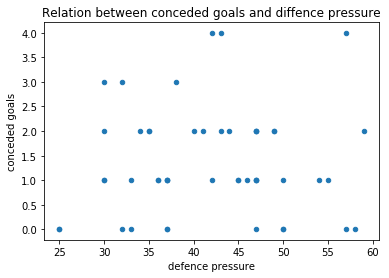

In [43]:
ax = matches_with_attr_df.plot.scatter(x='defencePressure',y='conceded_goals',
                                       title="Relation between conceded goals and diffence pressure");
ax.set_xlabel("defence pressure")
ax.set_ylabel("conceded goals")

Teams in middle of defence pressure are likely to concede more goals

Text(17.2,0.5,'conceded goals')

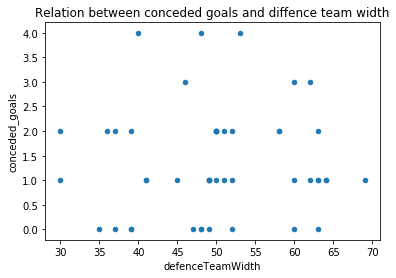

In [44]:
matches_with_attr_df.plot.scatter(x='defenceTeamWidth',y='conceded_goals',
                                  title="Relation between conceded goals and diffence team width");
ax.set_xlabel("defence team width")
ax.set_ylabel("conceded goals")

same happens with team width, in middle of defence team width are higher conceded goals

Text(0,0.5,'conceded goals')

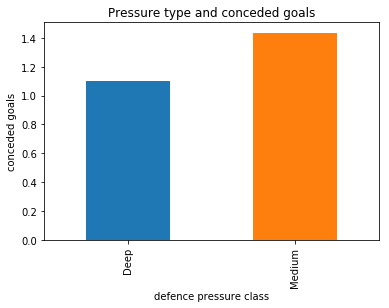

In [46]:
ax=matches_with_attr_df.groupby('defencePressureClass')['conceded_goals'].mean().plot(kind='bar',
                                                                                      title="Pressure type and conceded goals");
ax.set_xlabel("defence pressure class")
ax.set_ylabel("conceded goals")

Text(17.2,0.5,'conceded goals')

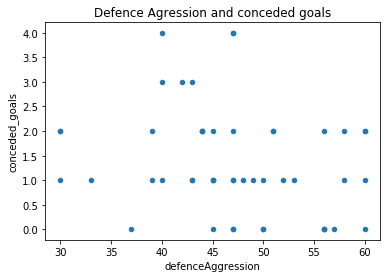

In [47]:
matches_with_attr_df.plot.scatter(x='defenceAggression',y='conceded_goals',
                                title="Defence Agression and conceded goals");
ax.set_xlabel("defence Agression")
ax.set_ylabel("conceded goals")

From graphs, it seems teams with high/deep pressure are meant to concede less goals while teams with medium pressure are more likely to concede more goals

### Research Question 2  (What player attributes would make player take higher rating)

To do this step we will do linear regression over multiple of attributes then taking each linear regression and see which one is the steepest 

In [40]:
def get_linear_regression(df,attr,Y):
    '''
    Args:
    df (dataframe) : dataframe to extract attributes from as numpy array
    attr (string) : attribute name to get values of
    Y (numpy array) : ground truth values to make linear regression with
    Returns : 
    tupel (X : extracted numpy array of attribute from dataframe ,
           Y_pred : numpy array of predicted values for X (i.e. points of regression line,
           W : coefficient of linear regression (i.e. slope of line),
           b : intercept (bias) of line)
    '''
    X =  df[attr].values.astype(int).reshape(-1,1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,Y)
    Y_pred = linear_regressor.predict(X)
    W = linear_regressor.coef_
    b = linear_regressor.intercept_
    return (X,Y_pred,W,b)


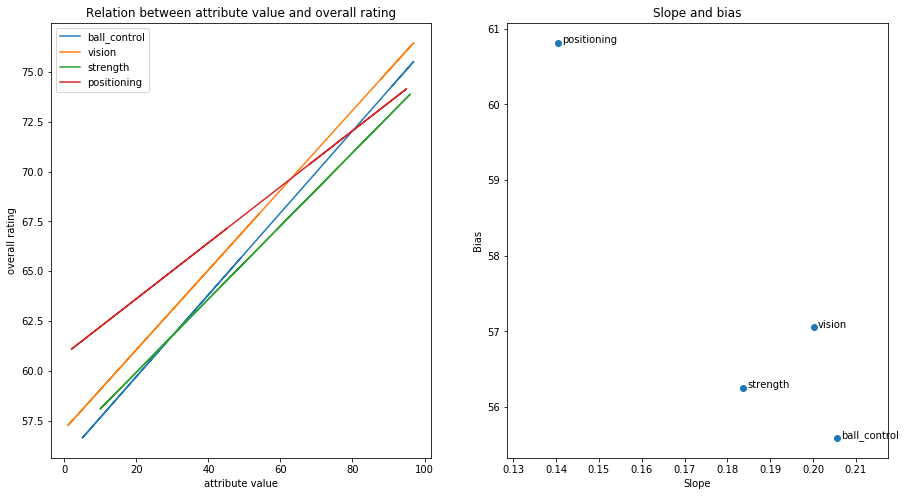

In [74]:

from sklearn.linear_model import LinearRegression
Y =  cleaned_combined_players_df['overall_rating'].values.astype(int).reshape(-1,1)

#List of attributes , you can add more attributes to compare with
attr_list = ['ball_control','vision','strength','positioning']
w_list=[]
b_list =[]
fig, (ax1,ax) = plt.subplots(1,2)
fig.set_size_inches(15, 8)
for attr in attr_list:
    X, Y_pred,w,b = get_linear_regression(cleaned_combined_players_df,attr,Y)
    ax1.plot(X,Y_pred,label=attr)
    ax1.lines[-1].set_label(attr)
    w_list.append(w)
    b_list.append(b)

ax1.set_title("Relation between attribute value and overall rating")
ax1.set_xlabel("attribute value")
ax1.set_ylabel("overall rating")
ax1.legend()
ax.scatter(w_list,b_list)
for i, txt in enumerate(attr_list):
    ax.annotate(txt, (w_list[i]+0.001,b_list[i]+0.001))
ax.set_title("Slope and bias")
ax.set_xlabel("Slope")
ax.set_ylabel("Bias")
plt.legend()

Though ball control has higher slope, vision makes more impact due to higher bias 

Positioning has high bias, but it's low slope make its impact less considered with other attributes

<a id='conclusions'></a>
## Conclusions


### Regards Q1
Teams that plays with mediums pressure perform the worst in aspect of conceding goals so it's better to play with deep high pressure or without at all 

More investegation can be made on other variables like `buildUpPlayPassing` or `buildUpPlayPassingClass` or other attributes
#### Limitation : 
The matches and teams attributes don't match many matches (only 49 matches) which makes the data a bit small to make a reasonable conclusion 
### Regards Q2 : 
Players with high vision are likely to have high overall rating

NOTE : we can try more attributes to investigate more 